<a href="https://colab.research.google.com/github/Karthickraja2004/Handwritten-Number-Detection/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml ('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x,y=mnist["data"],mnist["target"]

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
from pathlib import Path

IMAGES_PATH=Path()/"images"/"classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)



<function matplotlib.pyplot.show(close=None, block=None)>

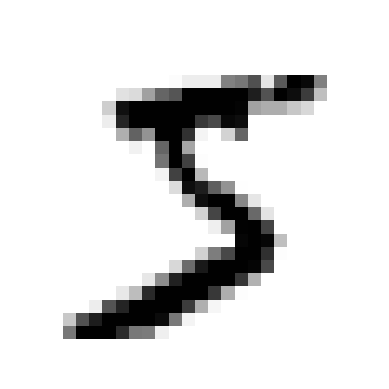

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit =x[0]
some_digit_image = some_digit.reshape (28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show

In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[:60000], y[:60000], y[:60000]

In [ ]:
y[0]

'5'

In [ ]:
y_train_5=(y_train=="5")
y_test_5=(y_test=="5")

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from  sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [ ]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
y_train_pred= cross_val_predict(sgd_clf, x_train, y_train_5, cv=5)
accuracy = accuracy_score(y_train_5, y_train_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9603333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_train_5, y_train_pred)
cm

array([[53115,  1464],
       [  916,  4505]])

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.7547327860613168

In [ ]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447